# Gradient Descent for Linear Regression
in this we will automate the process of choosing the W,B


In [1]:
#importing Librares
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./Material_By_Deeplearning/deeplearning.mplstyle')
import sys
sys.path.append('Material_By_Deeplearning/')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients #above path is steeted to import this library
import numpy as np
print("Import successfully")

Import successfully


## Problem Statement

Let's use the same two data points as before - a house with 1000 square feet sold for 300,000 Dollor and a house with 2000 square feet sold for 500,000 Dollor.

In [2]:
# Loading our tranning dataset 
X_Train = np.array([1.0,2.0])
Y_Train = np.array([300.0,500.0])

## Compute cost 

using the same methrod as we learn in previous lab



In [3]:
def Compute_cost(x,y,w,b):
    #finding length of the dataset 
    Length_of_data = len(x)
    cost_Sum = 0
    
    for i in range(0,Length_of_data):
        f_wb = (w*x[i])+b
        cost_individual = (f_wb -y[i])**2
        cost_Sum += cost_individual
    
    total_cost = (1/(2*Length_of_data))*cost_Sum
    
    return total_cost

<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 




In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.


<a name="toc_40291_2.2"></a>
## Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions. 
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous lab)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.

<a name="toc_40291_2.3"></a>
### compute_gradient
<a name='ex-01'></a>
`Compute_Gradient`  implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$. The embedded comments describe the operations.

In [4]:
def Compute_Gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      x (np.array (m,)): Data, m examples 
      y (np.array (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     
     """
    # Getting the number of tranning examples
    tranning_length = len(x)
    dj_dw = 0
    dj_db = 0
    
    for i in range(0,tranning_length):
        #finding Yhat i.e equation 1 example 
        f_wb = (w*x[i])+b
        #computing Sigma Part of the equation 4
        dj_dw_i = (f_wb - y[i])*x[i]
        dj_db_i = (f_wb - y[i])
        
        #Sum all to get whole sigma term 
        dj_dw += dj_dw_i
        dj_db += dj_db_i
        
    return dj_dw,dj_db  #always remeber the sequence i.e we are returing dj_dw frist 

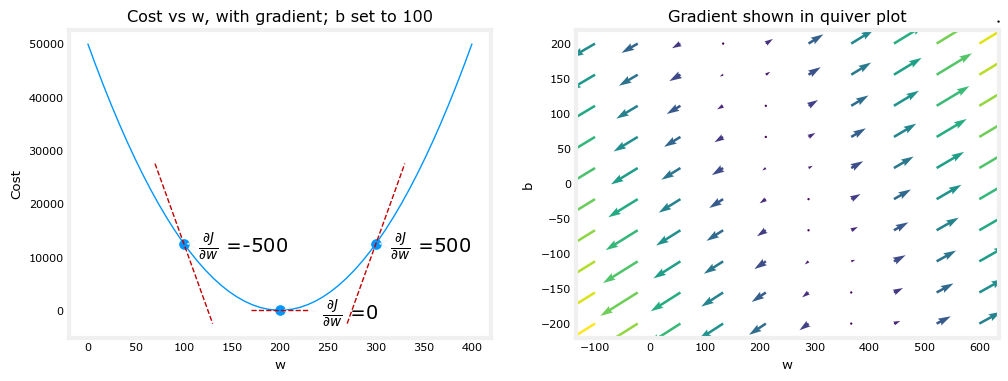

In [5]:
plt_gradients(X_Train,Y_Train, Compute_cost, Compute_Gradient)
plt.show()

Above, the left plot shows $\frac{\partial J(w,b)}{\partial w}$ or the slope of the cost curve relative to $w$ at three points. On the right side of the plot, the derivative is positive, while on the left it is negative. Due to the 'bowl shape', the derivatives will always lead gradient descent toward the bottom where the gradient is zero.
 
The left plot has fixed $b=100$. Gradient descent will utilize both $\frac{\partial J(w,b)}{\partial w}$ and $\frac{\partial J(w,b)}{\partial b}$ to update parameters. The 'quiver plot' on the right provides a means of viewing the gradient of both parameters. The arrow sizes reflect the magnitude of the gradient at that point. The direction and slope of the arrow reflects the ratio of $\frac{\partial J(w,b)}{\partial w}$ and $\frac{\partial J(w,b)}{\partial b}$ at that point.
Note that the gradient points *away* from the minimum. Review equation (3) above. The scaled gradient is *subtracted* from the current value of $w$ or $b$. This moves the parameter in a direction that will reduce cost.

For Better understanding reffer to notes of supervise machine learning on page number 24

<a name="toc_40291_2.5"></a>
###  Gradient Descent
Now that gradients can be computed,  gradient descent, described in equation (3) above can be implemented below in `gradient_descent`. The details of the implementation are described in the comments. Below, you will utilize this function to find optimal values of $w$ and $b$ on the training data.

In [6]:
def Compute_Gradient_Descent(x, y, w_in, b_in, alpha, num_iteration, cost_function, gradient_function):
    #defining an array to store the history of the j and w to plot in graph 
    J_History=[]
    WB_History=[]
    
    #setting the initial parameter 
    w = w_in
    b = b_in
    
    for i in range(0,num_iteration):
        #calling the "Compute_Gradient" function which is passed as a parmeter "gradient_function"
        #remember that "Compute_Gradient" function will return 2 value i.e dj_dw and dj_db respectivey
        dj_dw, dj_db = gradient_function(x,y,w,b)
        
        #updating parametres using equation 3
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        # saving cost of J and W
        # hear we are thinking about space complexity So here we are only going to store the values 
        # of J and W of previous 10,000 iterations because it is an 2d array and 1D array which need many many spcae 
        if i<100000: #this condition is an optional it is used for saving resources from getting ehaust
            J_History.append( cost_function(x,y,w,b) )
            WB_History.append([w,b])
        
        #printing the cost after every 1000 iteration 
            if (i%1000 == 0):
                # Access the last element of J_History (most recent cost value)
                cost = J_History[-1]
                print(f"Iteration {i:4}: Cost {cost:0.2e} ",
                      f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                      f"w: {w: 0.3e}, b:{b: 0.5e}")

    #returing Parameters 
    return w, b, J_History, WB_History

## NOW LET'S RUN THE CODE FOR FINDING w,b AUTOMATICALLY 

In [7]:
# INITILIZING PARAMETERS 
w = 0
b = 0
iteration = 10000
alpha = 1.0e-2

#let's Run Gradient Descent 
w_final, b_final, J_hist, p_hist = Compute_Gradient_Descent(X_Train ,Y_Train, w , b , alpha, iteration, Compute_cost, Compute_Gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.37e+04  dj_dw: -1.300e+03, dj_db: -8.000e+02   w:  1.300e+01, b: 8.00000e+00
Iteration 1000: Cost 7.91e-01  dj_dw: -3.577e-01, dj_db:  5.788e-01   w:  1.976e+02, b: 1.03961e+02
Iteration 2000: Cost 4.27e-02  dj_dw: -8.307e-02, dj_db:  1.344e-01   w:  1.994e+02, b: 1.00920e+02
Iteration 3000: Cost 2.30e-03  dj_dw: -1.929e-02, dj_db:  3.121e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 4000: Cost 1.24e-04  dj_dw: -4.480e-03, dj_db:  7.248e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 5000: Cost 6.69e-06  dj_dw: -1.040e-03, dj_db:  1.683e-03   w:  2.000e+02, b: 1.00012e+02
Iteration 6000: Cost 3.61e-07  dj_dw: -2.416e-04, dj_db:  3.909e-04   w:  2.000e+02, b: 1.00003e+02
Iteration 7000: Cost 1.95e-08  dj_dw: -5.610e-05, dj_db:  9.077e-05   w:  2.000e+02, b: 1.00001e+02
Iteration 8000: Cost 1.05e-09  dj_dw: -1.303e-05, dj_db:  2.108e-05   w:  2.000e+02, b: 1.00000e+02
Iteration 9000: Cost 5.66e-11  dj_dw: -3.025e-06, dj_db:  4.895e-06   w:  2.000e+02, b: 1.00000e+02


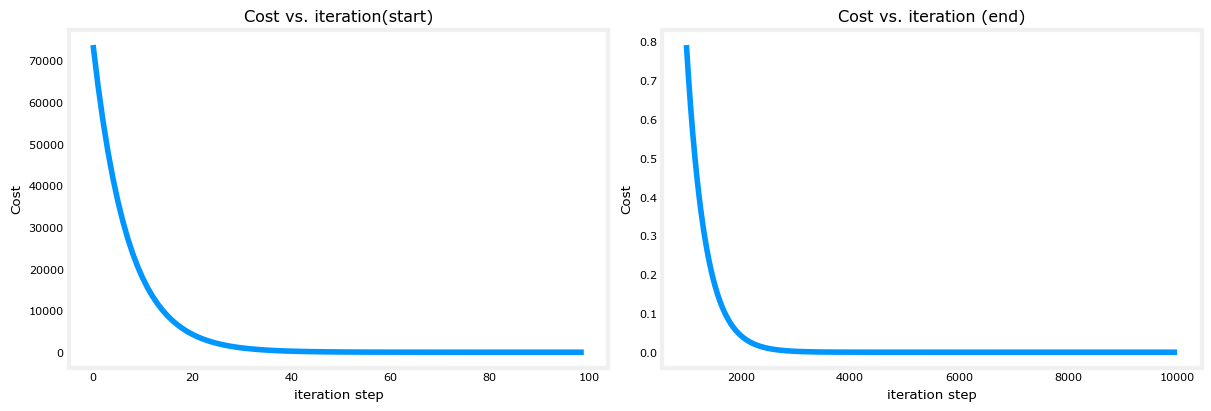

In [8]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            
ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  
ax2.set_xlabel('iteration step') 
plt.show()

## NOW WE GOT THE FINAL w,b SO ITS TIME TO MAKE A PRIDECTION FUNCTION AND ENJOY PREDICTION HOUSE PRICE 

In [9]:
def Pridect_cost(x):
    return (w_final*x)+b_final

In [10]:
# remember we are taking sacle as 1 = 1000 sqft
print(f"1000 sqft house prediction {Pridect_cost(1):0.3f} Thousand dollars")
print(f"1200 sqft house prediction {Pridect_cost(1.2):0.3f} Thousand dollars")
print(f"2000 sqft house prediction {Pridect_cost(2):0.3f} Thousand dollars")

1000 sqft house prediction 300.000 Thousand dollars
1200 sqft house prediction 340.000 Thousand dollars
2000 sqft house prediction 500.000 Thousand dollars


## Congratulations!

#### we have make an learning algorithm who automatic choosing parameter